Notebook solo per avere template funzionati di metodi di opt

In [4]:
import problems.golomb_simple as gl

# DRO
ic = [0.896508460944940632764, 0., 0., 0.000000000000013951082, 0.474817948848534454598, 0.]
period = 2.6905181697222775
# Number of satellites
N = 5

# Grid size
grid_size = 11

############### Constants
# Number of observations
M = 3
T = period*(M-1) # This makes it so that each observation is made after each period

mu = 0.01215058560962404  # M_L/(M_T + M_L)

scaling_factor = 1e-4

inflation_factor = 1.23
###############

# Instantiate UDP
udp = gl.orbital_golomb_array(n_sat=N, ic = ic, T = T, grid_size=grid_size, scaling_factor = scaling_factor, n_meas=M, inflation_factor = inflation_factor, mu=mu, verbose=False)

## Genetico

### Pygad

/home/mott/.local/lib/python3.10/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


Migliore soluzione trovata: [ 0.36433643 -0.12171217 -0.85918592  0.02150215  0.67076708 -0.07150715
 -0.47914791 -0.6549655  -0.58435844  0.20352035 -0.43794379  0.64036404
 -0.28192819  0.68536854  0.8169817   0.19591959 -0.26692669  0.35953595
  0.53075308  0.05770577 -0.73777378  0.28572857 -0.5979598   0.26572657
  0.56935694  0.56275628  0.64516452  0.9959996  -0.74457446  0.35913591]
Valore totale: 1.0


/home/mott/.local/lib/python3.10/site-packages/pygad/visualize/plot.py:109: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplotlib.pyplot.legend()


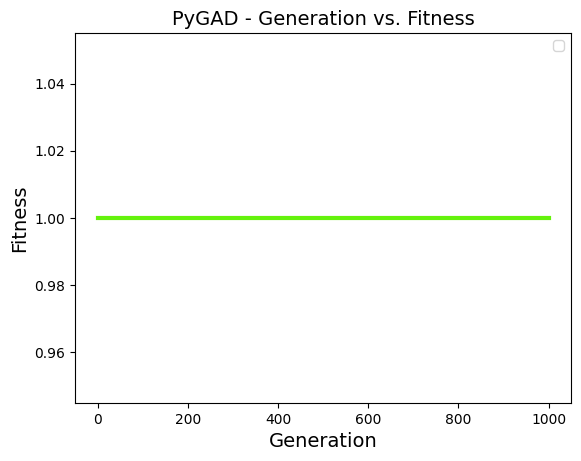

XY


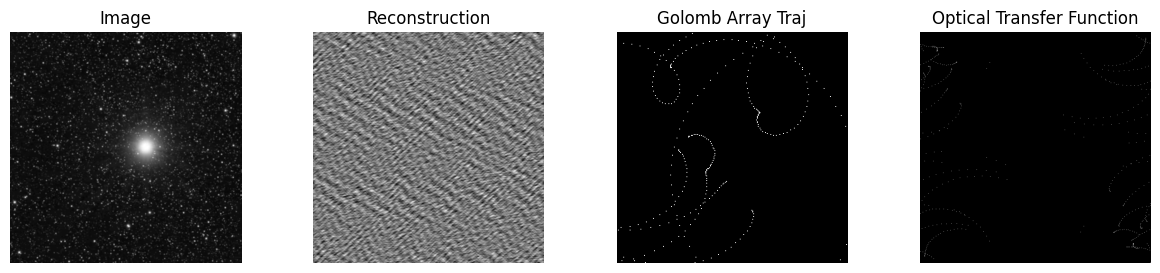

XZ


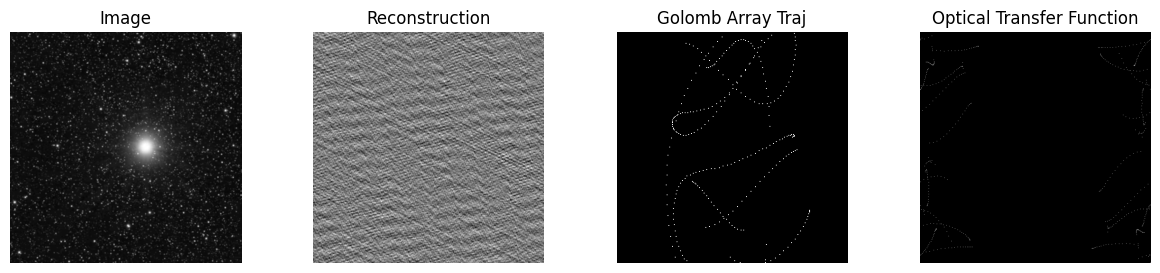

YZ


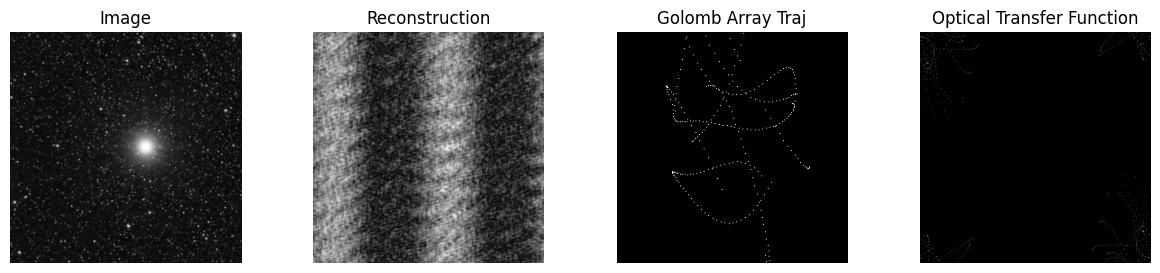

In [9]:
import pygad
import numpy as np

def fitness_function(ga_instancem: pygad.GA,solution, solution_idx):
    return udp.fitness_impl(x=solution, multi=False)[0] + 1

parametri_ga = {    # Parametri dell'algoritmo https://pygad.readthedocs.io/en/stable/pygad.html
    "num_generations": 1000, # Numero di Iterazioni
    "fitness_func": fitness_function,   # Funzione da minimizzare
    "save_best_solutions": False,

    # Conf popolazione
    "sol_per_pop": 50,  # Numeo di soluzioni per popolazione
    "num_genes": 30,    # Numero di geni (Grandezza soluzione)
    "gene_type" : float,
    "gene_space": np.linspace(-1.0, 1.0, 10**(4)),    # Valori assumibili da ogni gene

    #Conf gestione genitori ad ogni iterazione
    "parent_selection_type": "rws", # sss (steady-state selection), rws (roulette wheel selection), sus (stochastic universal selection), rank, random, tournament.
    "keep_parents": 3,  # Numero di genitori mantenuti per ogni crossover (< sol_per_pop)

    # Conf Ereditarietà genitori figlio
    "num_parents_mating": 5,    # Numero di genitori selezionati per generare figli
    "crossover_type": "single_point",   # single_point, two_points, uniform, and scattered .

    # Conf differenziazione tra genitori figlio
    "mutation_type": "random",    # random, swap, inversion, scramble, and adaptive
    "mutation_probability": 0.2   # Probabilità di mutazione
}

def callback_generations(ga_instance):
    return
    print(f"{ga_instance.generations_completed}: Migliore soluzione = {ga_instance.best_solution()[0]} Fitness = {ga_instance.best_solution()[1]}")

ga_instance = pygad.GA(**parametri_ga, on_generation=callback_generations)
ga_instance.run()


soluzione, valore_fitness, _ = ga_instance.best_solution()
print("Migliore soluzione trovata:", soluzione)
print("Valore totale:", valore_fitness)

_ = ga_instance.plot_fitness() # Mostra grafico della convergenza

N_obs = 300
udp.plot_simulated_reconstruction(soluzione, N_obs, image_path="../data/star.jpg")

## Scipy

differential_evolution step 1: f(x)= 0.9795918367346939
Polishing solution with 'L-BFGS-B'
Migliore soluzione trovata: [ 0.18841427 -0.74179659  0.95054608 -0.07262315  0.84767366 -0.03391482
 -0.68414225  0.37541745  0.01514368 -0.20545111 -0.33665482  0.31550633
 -0.41032523 -0.89258995 -0.49944718  0.35616738  0.7808857   0.75014552
 -0.46486793 -0.70721653  0.47585558 -0.79390274  0.67502445 -0.21365708
  0.82929597  0.24533119 -0.55664668  0.34952441  0.75417675  0.05547191] size:  30
Valore totale: 0.9795918367346939
XY


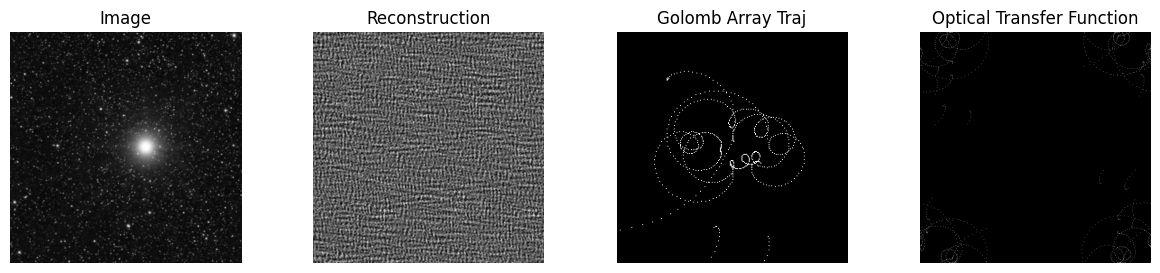

XZ


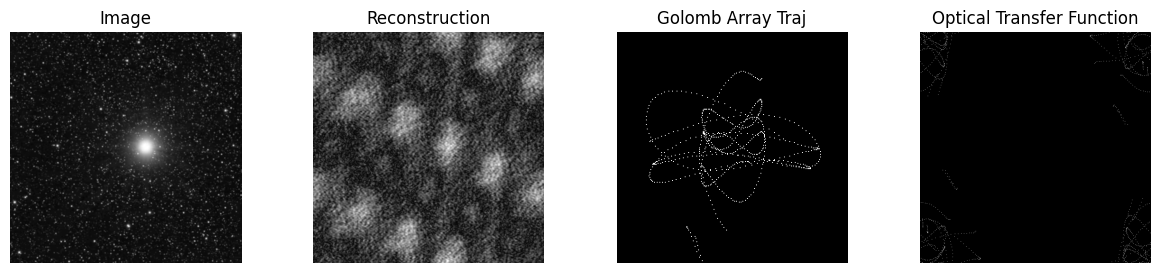

YZ


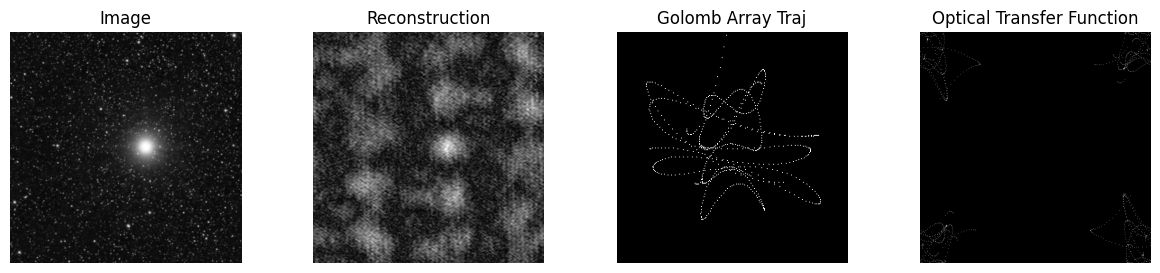

In [ ]:
from scipy.optimize import differential_evolution

def fitness_function(solution):
    return udp.fitness(solution)[0] + 1  # Return the first element of the fitness result

bounds = [(-1.0, 1.0)] * udp.n_sat * 6

result = differential_evolution(
    func=fitness_function, 
    bounds=bounds, 
    maxiter=3000, 
    popsize=100, 
    mutation=(0.3, 1), 
    recombination=0.3,
    init = 'latinhypercube',
    polish = True,
    disp = True
    )

soluzione = result.x
valore_fitness = result.fun
print("Migliore soluzione trovata:", soluzione, "size: ", len(soluzione))
print("Valore totale:", valore_fitness)

N_obs = 300
udp.plot_simulated_reconstruction(soluzione, N_obs, image_path="../data/star.jpg")